In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()


In [2]:
network_list = ['GIANT-TN', 'GIANT-TN-c01', 'STRING']
dataset_list = ['GOBP', 'KEGGBP', 'DisGeNet']
method_list = ['gcn', 'sage', 'Node2vec+', 'Node2vec']

n2v_result_df = pd.read_csv('../result/gene_classification_n2v.csv')
optim_idx_ary = n2v_result_df.groupby(['Network', 'Method', 'Task'])['Validation score'].agg('idxmax').values
optim_n2v_result_df = n2v_result_df.iloc[optim_idx_ary]

gnn_result_df = pd.read_csv('../result/gene_classification_gnn.csv')
result_df = pd.concat((optim_n2v_result_df, gnn_result_df))


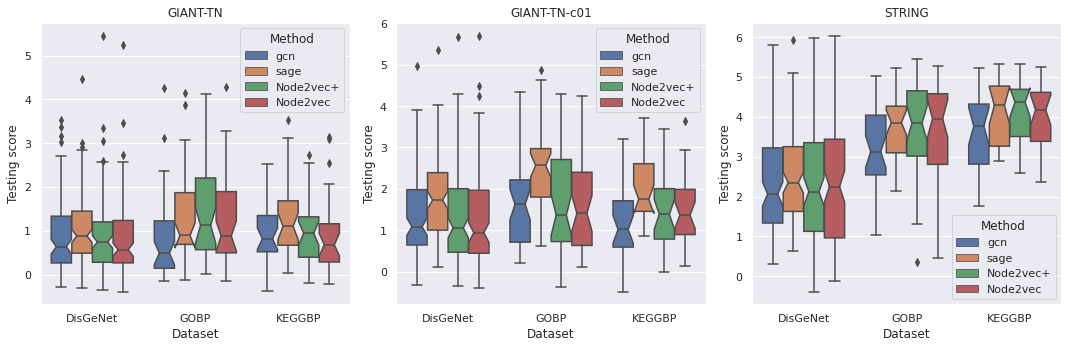

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

for network, group in result_df.groupby('Network'):
    ax = axes[network_list.index(network)]
    sns.boxplot(data=group, x='Dataset', y='Testing score', 
                hue='Method', hue_order=method_list, notch=True, ax=ax)
    ax.set_title(network)

plt.tight_layout()
plt.show()
